In [ ]:
#calculos
import numpy as np
#analisis de datos
import pandas as pd
#graficas
import matplotlib.pyplot as plt

#funciones jerarquicos
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


In [ ]:
datos = {
"Estadistica": [10 , 9, 10, 8 , 9,7,10,5,10,8,6,10,10,9,10,9,9,7,7,6,9,7,8,8,6,8,9,9,9] ,
"Probabilidad": [10 , 9, 9 , 8 , 10,6,10,5,10,8,6,10,10,9,10,9,9,7,7,6,7,7,8,6,6,9,9,8,9] ,
"Ingles": [9 , 9, 10 , 6 , 6,10,10,5,9,8,6,5,10,9,8,9,9,7,7,6,9,7,8,7,5,9,9,9,10] ,
"Algebra": [8 , 8, 8 , 6 , 8,5,10,5,9,8,6,10,9,9,9,10,9,7,7,6,8,6,9,8,5,10,10,7,10] ,
"Demografia": [10 , 10, 10 , 10 , 10,10,10,5,10,8,6,10,10,9,10,10,9,7,7,6,8,6,10,8,5,8,10,8,9] ,
"Alumno": ["Francisco", "Diego", "Denilson", "Juan", "Tienda","Jesus","David","Yahir","Arturo","Hector",
           "Eduardo","Claudio","Paquito","Erick","Jessica","Rugerio","Luis","Ramon","Martin","Armenta","Ana",
           "Perla","Gabo","Esau","Adan","Apolinar","Marelyn","Oswaldo","Fernanda"]
 }

In [ ]:
estudiantes = pd.DataFrame(datos)
#nombre del alumno como etiqueta (las filas tienen un nombre  )
estudiantes.set_index("Alumno", inplace=True)
estudiantes.head()

,Estadistica,Probabilidad,Ingles,Algebra,Demografia
Alumno,,,,,
Francisco,10,10,9,8,10
Diego,9,9,9,8,10
Denilson,10,9,10,8,10
Juan,8,8,6,6,10
Tienda,9,10,6,8,10


In [ ]:
estudiantes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, Francisco to Fernanda
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Estadistica   29 non-null     int64
 1   Probabilidad  29 non-null     int64
 2   Ingles        29 non-null     int64
 3   Algebra       29 non-null     int64
 4   Demografia    29 non-null     int64
dtypes: int64(5)
memory usage: 1.4+ KB


In [ ]:
#extraemos los valores en una matriz
calificaciones = estudiantes.iloc[:, [0, 1, 2, 3, 4]].values
calificaciones

array([[10, 10,  9,  8, 10],
       [ 9,  9,  9,  8, 10],
       [10,  9, 10,  8, 10],
       [ 8,  8,  6,  6, 10],
       [ 9, 10,  6,  8, 10],
       [ 7,  6, 10,  5, 10],
       [10, 10, 10, 10, 10],
       [ 5,  5,  5,  5,  5],
       [10, 10,  9,  9, 10],
       [ 8,  8,  8,  8,  8],
       [ 6,  6,  6,  6,  6],
       [10, 10,  5, 10, 10],
       [10, 10, 10,  9, 10],
       [ 9,  9,  9,  9,  9],
       [10, 10,  8,  9, 10],
       [ 9,  9,  9, 10, 10],
       [ 9,  9,  9,  9,  9],
       [ 7,  7,  7,  7,  7],
       [ 7,  7,  7,  7,  7],
       [ 6,  6,  6,  6,  6],
       [ 9,  7,  9,  8,  8],
       [ 7,  7,  7,  6,  6],
       [ 8,  8,  8,  9, 10],
       [ 8,  6,  7,  8,  8],
       [ 6,  6,  5,  5,  5],
       [ 8,  9,  9, 10,  8],
       [ 9,  9,  9, 10, 10],
       [ 9,  8,  9,  7,  8],
       [ 9,  9, 10, 10,  9]])

## Creando el Dendograma del Clustering Jerarquico

In [ ]:
#Agrupamos clusters con el metodo ward
Clustering_Jerarquico = linkage(calificaciones, method="ward")

Text(0.5, 0, 'Alumnos')

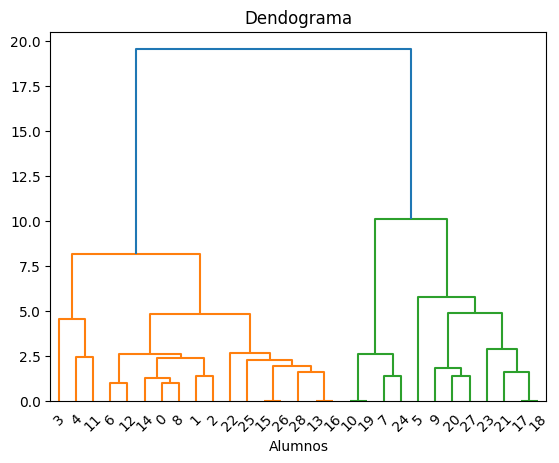

In [ ]:
#generamos el dendograma
dendrogram = sch.dendrogram(Clustering_Jerarquico)
plt.title("Dendograma")
plt.xlabel("Alumnos")

## Asignando los Clusters a cada estudiante


In [ ]:
#Asiganamos la funcion del dendograma, t=altura del corte, criterio para hacer el corte
clusters = fcluster(Clustering_Jerarquico, t = 3, criterion="maxclust")

In [ ]:
clusters

array([1, 1, 1, 1, 1, 3, 1, 2, 1, 3, 2, 1, 1, 1, 1, 1, 1, 3, 3, 2, 3, 3,
       1, 3, 2, 1, 1, 3, 1], dtype=int32)

In [ ]:
estudiantes["Cluster Jerarquico"] = clusters
estudiantes

,Estadistica,Probabilidad,Ingles,Algebra,Demografia,Cluster Jerarquico
Alumno,,,,,,
Francisco,10,10,9,8,10,1
Diego,9,9,9,8,10,1
Denilson,10,9,10,8,10,1
Juan,8,8,6,6,10,1
Tienda,9,10,6,8,10,1
Jesus,7,6,10,5,10,3
David,10,10,10,10,10,1
Yahir,5,5,5,5,5,2
Arturo,10,10,9,9,10,1
